<a href="https://colab.research.google.com/github/2303A52123/Generative-AI/blob/main/GEN_AI(A_10)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.9016 - loss: 0.3155 - val_accuracy: 0.9819 - val_loss: 0.0527
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 40ms/step - accuracy: 0.9850 - loss: 0.0465 - val_accuracy: 0.9893 - val_loss: 0.0325
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 39ms/step - accuracy: 0.9915 - loss: 0.0267 - val_accuracy: 0.9894 - val_loss: 0.0307
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - accuracy: 0.9933 - loss: 0.0209 - val_accuracy: 0.9906 - val_loss: 0.0283
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 77s 39ms/step - accuracy: 0.9954 - loss: 0.0141 - val_accuracy: 0.9912 - val_loss: 0.0276
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 70s 37ms/step - accuracy: 0.9963 - loss: 0.0113 - val_accuracy: 0.9869 - val_loss: 0.0414
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 42ms/step - accuracy: 0.9970 - loss: 0.0104 - val_accuracy: 0.9904 - val_loss: 0.0353
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 38ms/step - accuracy: 0.9971 -

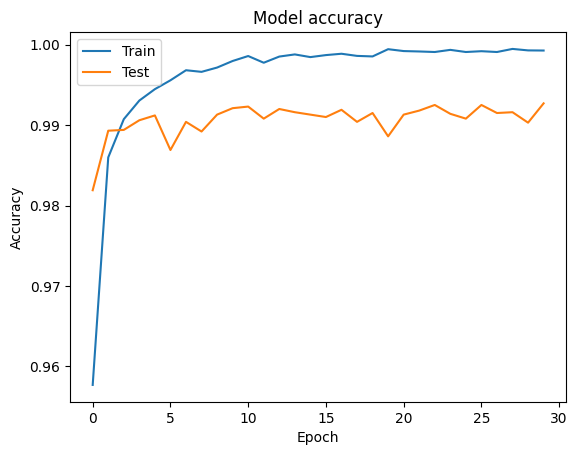

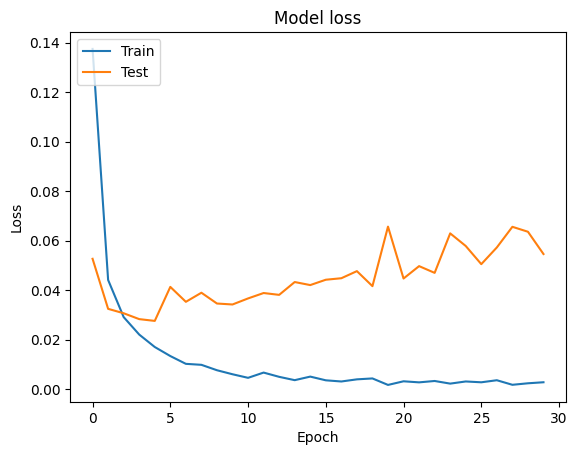

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize pixel values to the range 0-1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Reshape images to add a channel dimension
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))
model = models.Sequential([
    layers.Conv2D(33, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(train_images, train_labels, epochs=30, batch_size=32, validation_data=(test_images, test_labels))
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc:.4f}')
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()